y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


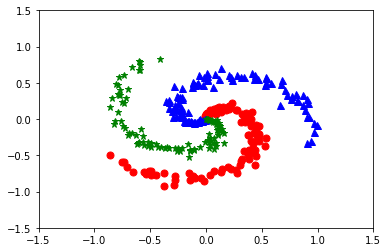

In [79]:
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import math
import numpy as np
np.random.seed(2)
N =100 # number of points per class
d = 2 # dimension
C = 3 # number of classes
X = np.zeros((d,N*C)) #data matrix
y = np.zeros(N*C,dtype ='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1)) # cột (0-300)
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
# print('X',X)
print('y',y)
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)
plt.plot(X[0,:N],X[1,:N],'ro',markersize =7)
plt.plot(X[0,N:2*N],X[1,N:N*2],'b^',markersize =7)
plt.plot(X[0,2*N:],X[1,2*N:],'g*',markersize =7)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.show()

In [80]:
def softmax(s):
    e_s = np.exp(s - np.max(s,axis =0, keepdims =True))
    return e_s/e_s.sum( axis =0)
## One-hot coding
from scipy import sparse
def convert_labels(y, C= 3):
    Y =sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = ( C, len(y))).toarray()
    return Y
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]


# Phần thuật toán chính

In [81]:
d0 = 2# input layer
d1 = h = 100 # height of hidden layer
d2 = C = 3 # output layer
# initialize parameters randomly
w1 = 0.01* np.random.randn(d0,d1)
# print(w1)
b1 = np.zeros((d1,1)) #bias1
w2 = 0.01* np.random.randn(d1,d2)
b2 = np.zeros((d2,1)) # bias2
# convert label => one hot coding
Y = convert_labels(y,C=3)
N = X.shape[1]
print('N =',N)
print('Y= ', Y) # matrix one hot coding : 3 row, 300 columns
eta = 1 #learning rate
for i in range(50000):
    #feed forward
    Z1 = np.dot(w1.T,X) + b1
    A1 = np.maximum(Z1,0)
    Z2 = np.dot(w2.T,A1) + b2
    Yhat = softmax(Z2)
    # print loss after each 1000 interations
    if i % 1000 ==0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print( 'interation: %d, loss : %.5f' %(i,loss))
    # backpropagation
    E2 = 1/N * (Yhat -Y)
    dw2 = np.dot(A1,E2.T)
    db2 = np.sum(E2, axis =1, keepdims=True)
    E1 = np.dot(w2,E2) # E1 = W2*E2* grad(z), mà đạo hàm của f'(z)= 1 nếu x>0, và f'(z)=0 nếu x<=0 ( nên mặc định nó bằng 1)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dw1 = np.dot(X,E1.T)
    db1 = np.sum(E1, axis =1, keepdims =True)
    # gradient descent update
    w1 = w1 - eta*dw1
    b1 = b1 - eta*db1
    w2 = w2 - eta*dw2
    b2 = b2 - eta*db2

N = 300
Y=  [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [82]:
# Kết quả
Z1 = np.dot(w1.T,X) + b1
A1 = np.maximum(Z1,0)
Z2 = np.dot(w2.T,A1) + b2
predict_class = np.argmax(Z2,axis =0)
print('predict class: ', predict_class)
print('train accuracy score: ', 100* np.mean(predict_class==y))
from sklearn.metrics import accuracy_score
print('accuracy_score:',100*accuracy_score(y, predict_class))

predict class:  [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
train accuracy score:  99.33333333333333
accuracy_score: 99.33333333333333


(1, 14400)
100


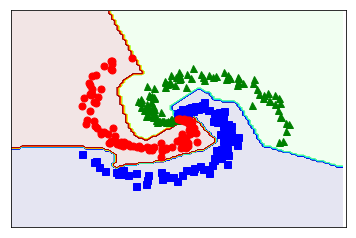

In [88]:
#Visualization
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))

# print(X.shape)

Z1 = np.dot(w1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(w2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1) # tính xem mỗi điểm thuộc class nào rồi cho màu tương ứng. k trực tiếp vẽ boundary line

N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()